# Dataset Stats

This notebook will show statistics about both datasets the short-term and the long-term. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import numpy as np

## Long-term dataset

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df["dataset"] = "train"
valid_df = pd.read_csv("data/valid.csv")
valid_df["dataset"] = "valid"
test_df = pd.read_csv("data/test.csv")
test_df["dataset"] = "test"

df = pd.concat([train_df, valid_df, test_df])

/home/jchan/anaconda3/envs/bees/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


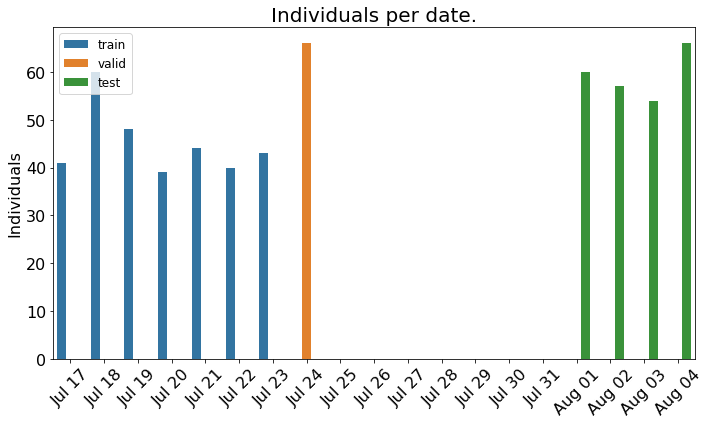

In [4]:
df["days"] = pd.to_datetime(df["days"])
dfGrupedByDayID = df.groupby(["days", "dataset"]).apply(lambda x : len(x.track_tag_id.unique()))
dfGrupedByDayID = dfGrupedByDayID.reset_index()
dfGrupedByDayID.index = dfGrupedByDayID.days

idx = pd.date_range('2019-07-17', '2019-08-04')
dfGrupedByDayID = dfGrupedByDayID.reindex(idx, fill_value=0)


dfGrupedByDayID.loc[dfGrupedByDayID.dataset == 0, "dataset"] = "test"

plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.barplot(x=dfGrupedByDayID.index, y=0, hue="dataset", data=dfGrupedByDayID, ax=ax)
x_labels = dfGrupedByDayID.index.strftime('%h %d')
ax.set_xticklabels(x_labels, rotation=45, fontsize=16);
ax.set_yticklabels(range(0, 70, 10), fontsize=16);
ax.set_ylabel("Individuals", fontsize=16)
ax.set_title("Individuals per date.", fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("dataset_stats/nidsperday.png")

In [5]:
len(train_df.track_tag_id.unique()), len(train_df), len(train_df.global_track_id.unique())

(181, 3777, 801)

In [6]:
train_df.groupby("global_track_id").apply(lambda x: len(x)).mean()

4.715355805243446

In [7]:
train_df.groupby("track_tag_id").apply(lambda x: len(x.global_track_id.unique())).mean()

4.425414364640884

In [8]:
len(valid_df.track_tag_id.unique()), len(valid_df), len(valid_df.global_track_id.unique())

(66, 1909, 309)

In [9]:
valid_df.groupby("global_track_id").apply(lambda x: len(x)).mean()

6.17799352750809

In [10]:
valid_df.groupby("track_tag_id").apply(lambda x: len(x.global_track_id.unique())).mean()

4.681818181818182

In [11]:
len(test_df.track_tag_id.unique()), len(test_df), len(test_df.global_track_id.unique())

(126, 3276, 696)

In [12]:
test_df.groupby("global_track_id").apply(lambda x: len(x)).mean()

4.706896551724138

In [13]:
test_df.groupby("track_tag_id").apply(lambda x: len(x.global_track_id.unique())).mean()

5.523809523809524

/home/jchan/anaconda3/envs/bees/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


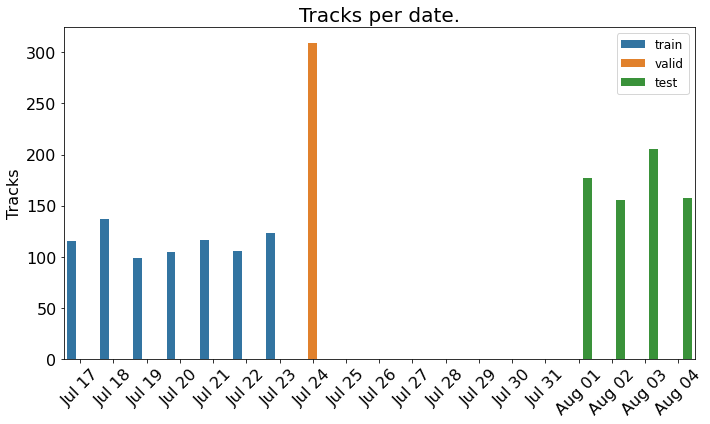

In [27]:
df["days"] = pd.to_datetime(df["days"])
dfGrupedByDayID = df.groupby(["days", "dataset"]).apply(lambda x : len(x.global_track_id.unique()))
dfGrupedByDayID = dfGrupedByDayID.reset_index()
dfGrupedByDayID.index = dfGrupedByDayID.days

idx = pd.date_range('2019-07-17', '2019-08-04')
dfGrupedByDayID = dfGrupedByDayID.reindex(idx, fill_value=0)


dfGrupedByDayID.loc[dfGrupedByDayID.dataset == 0, "dataset"] = "test"

plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.barplot(x=dfGrupedByDayID.index, y=0, hue="dataset", data=dfGrupedByDayID, ax=ax)
x_labels = dfGrupedByDayID.index.strftime('%h %d')
ax.set_xticklabels(x_labels, rotation=45, fontsize=16);
ax.set_yticklabels(range(0, 350, 50), fontsize=16);
ax.set_ylabel("Tracks", fontsize=16)
ax.set_title("Tracks per date.", fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("dataset_stats/ntracksperday.png")

In [28]:
def get_track_duration(df):
    df = df.sort_values("datetime")
    sorted_dates = df.datetime.values
    return sorted_dates[-1] - sorted_dates[0]

In [29]:
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
tracks_durations = train_df.groupby("track_tag_id").apply(get_track_duration)
tracks_durations.min(), tracks_durations.mean(), tracks_durations.max()

(Timedelta('0 days 00:00:00'),
 Timedelta('1 days 01:52:36.029281767'),
 Timedelta('6 days 02:05:09.400000'))

In [30]:
valid_df["datetime"] = pd.to_datetime(valid_df["datetime"])
tracks_durations = valid_df.groupby("track_tag_id").apply(get_track_duration)
tracks_durations.min(), tracks_durations.mean(), tracks_durations.max()

(Timedelta('0 days 00:00:00'),
 Timedelta('0 days 01:52:31.893181818'),
 Timedelta('0 days 09:00:32.900000'))

In [31]:
test_df["datetime"] = pd.to_datetime(test_df["datetime"])
tracks_durations = test_df.groupby("track_tag_id").apply(get_track_duration)
tracks_durations.min(), tracks_durations.mean(), tracks_durations.max()

(Timedelta('0 days 00:00:00'),
 Timedelta('1 days 02:53:03.416269841'),
 Timedelta('3 days 08:05:47.250000'))

In [32]:
train_ids = set(train_df.track_tag_id.unique())
test_ids = set(test_df.track_tag_id.unique())

len(train_ids & test_ids)

29

In [33]:
mask = np.ones((512, 512, 3))
mask[256:, 128:384,:] = 0

def highlight_thorax(image, mask, alpha=0.7):
    im = image.copy()
    out = image.copy()
    out = im * alpha + (1 - alpha) * mask
    out[256:, 128:384,:] = im[256:, 128:384,:]
    return out

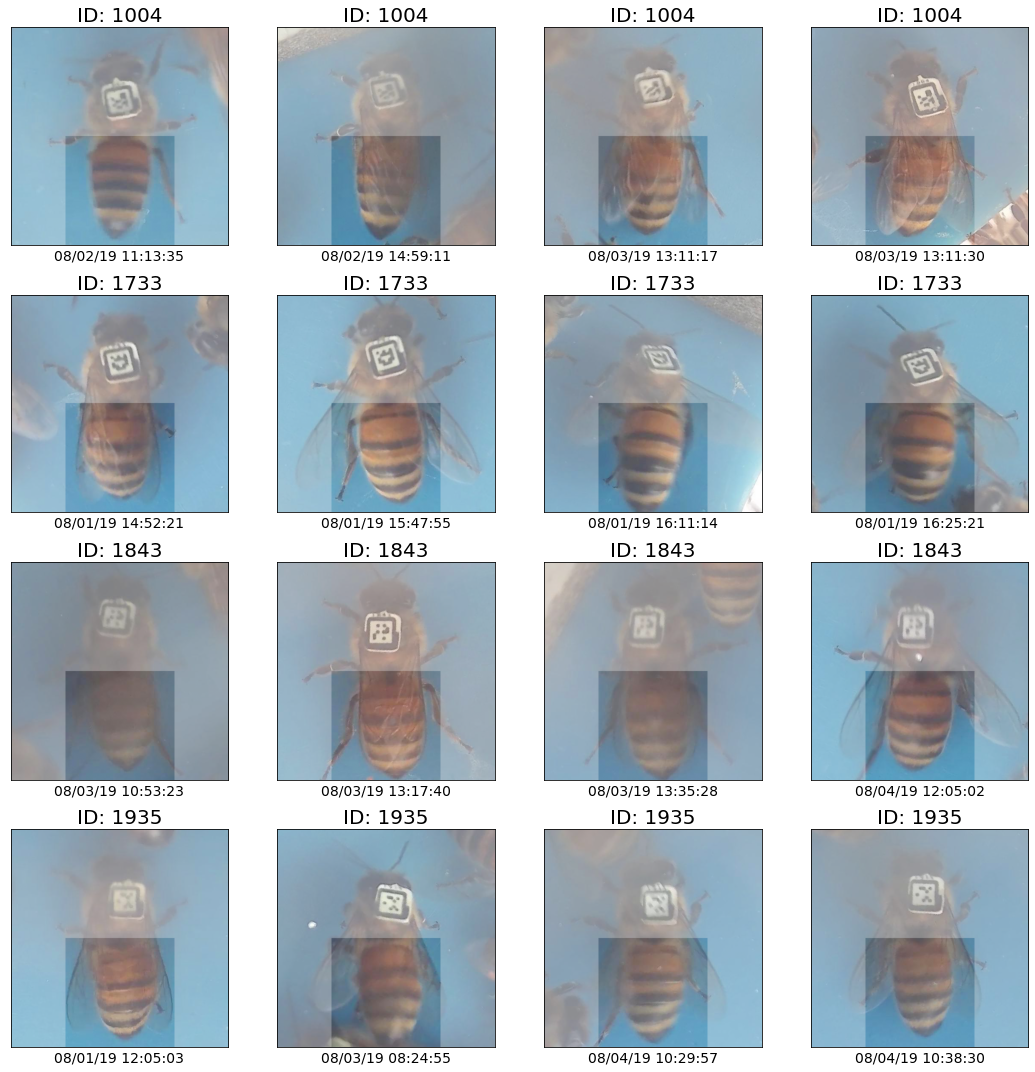

In [34]:
IMAGES_PER_ID = 4
IDS_NUM = 4


test_df["datetime"] = pd.to_datetime(test_df["datetime"])
selected_ids = test_df.groupby(["track_tag_id"]).apply(lambda x: len(x["global_track_id"].unique())).sort_values().tail(IDS_NUM).index.values
sample_df = test_df[test_df.track_tag_id.isin(selected_ids)]
sample_df = sample_df.groupby("global_track_id").sample(1)
sample_df = sample_df.groupby("track_tag_id").sample(IMAGES_PER_ID).sort_values(["track_tag_id", "datetime"])

fig, ax = plt.subplots(IDS_NUM, IMAGES_PER_ID, figsize=(15, 15))
ax = ax.ravel()

for i, (_, row) in enumerate(sample_df.iterrows()):
    image = io.imread(row.filename)/255.
    ax[i].imshow(highlight_thorax(image, mask))
    ax[i].set_title("ID: {}".format(row["track_tag_id"]), fontsize=20)
    ax[i].set_xlabel("{}".format(row["datetime"].strftime('%x %X')), fontsize=14)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    
plt.tight_layout()
plt.savefig("imgs/test_dataset_example.png")

## Short-term dataset

In [35]:
utrain_df = pd.read_csv("data/untagged_dataset.csv")

In [36]:
len(utrain_df), len(utrain_df.global_track_id.unique())

(109654, 4949)

In [37]:
utrain_df.groupby("global_track_id").apply(lambda x: len(x)).mean()

22.15679935340473

In [38]:
utrain_df["datetime"] = pd.to_datetime(utrain_df["datetime"])
tracks_durations = utrain_df.groupby("global_track_id").apply(get_track_duration)
tracks_durations.min(), tracks_durations.mean(), tracks_durations.max()

(Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:05.684825217'),
 Timedelta('0 days 00:01:27.500000'))

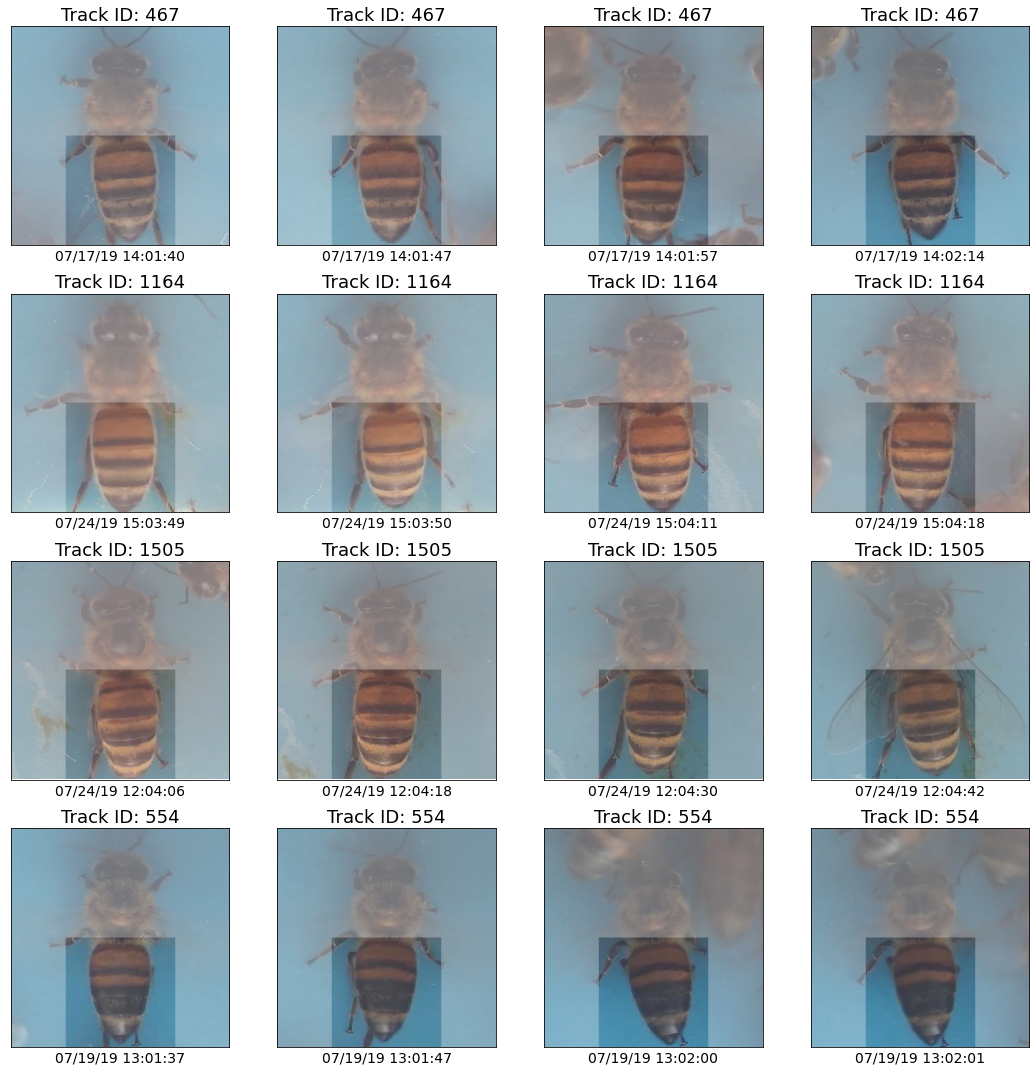

In [39]:
IMAGES_PER_ID = 4
IDS_NUM = 4

utrain_df["datetime"] = pd.to_datetime(utrain_df["datetime"])
selected_ids = utrain_df.groupby("global_track_id").apply(len).sort_values().tail(IDS_NUM*4).sample(IDS_NUM).index
sample_df = utrain_df[utrain_df.global_track_id.isin(selected_ids)]
sample_df = sample_df.groupby("global_track_id").sample(IMAGES_PER_ID).sort_values(["global_track_id", "datetime"])

fig, ax = plt.subplots(IDS_NUM, IMAGES_PER_ID, figsize=(15, 15))
ax = ax.ravel()

for i, (_, row) in enumerate(sample_df.iterrows()):
    image = io.imread(row.filename)/255.
    ax[i].imshow(highlight_thorax(image, mask))
    ax[i].set_title("Track ID: {}".format(row["track_id"]), fontsize=18)
    ax[i].set_xlabel("{}".format(row["datetime"].strftime('%x %X')), fontsize=14)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    
plt.tight_layout()
plt.savefig("imgs/untagged_dataset_example.png")

#### Evaluation

In [19]:
same_hour = pd.read_csv("data/test_same_hour2.csv")
same_hour_diff_day = pd.read_csv("data/test_different_day_same_hour2.csv")
diff_day = pd.read_csv("data/test_different_day2.csv")

In [24]:
same_hour.gallery_id.max()

379

In [25]:
same_hour_diff_day.gallery_id.max()

236

In [26]:
diff_day.gallery_id.max()

1518